![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [12]:
df.shape

(7565, 7)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


# size ustunini go'rib chiqish

In [14]:
df[df['size'].str.len()>5] # bi kod bilan 5347-qatordaki xatoni topdim

,location,district,rooms,size,level,max_levels,price
857,"город Ташкент, Мирзо-Улугбекский район, Мирзак...",Мирзо-Улугбекский,3,113.60,2,5,115000
936,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,4,129.14,5,11,92479
961,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,4,108.27,5,11,77534
1040,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,4,128.66,5,11,92135
1433,"город Ташкент, Юнусабадский район, Кашгар",Юнусабадский,5,183.50,4,5,203000
2054,"город Ташкент, Сергелийский район, Курувчи",Сергелийский,3,105.60,9,9,45474
3543,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,4,108.27,10,11,69780
3587,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,4,129.18,10,11,83257
3638,"город Ташкент, Олмазорский район, Медгородок",Олмазорский,3,205.80,1,6,95000
3643,"город Ташкент, Олмазорский район, Медгородок",Олмазорский,3,205.80,1,6,95000


In [15]:
df.loc[5347, 'size']=100

In [16]:
df['size']=df['size'].astype(float)

In [17]:
df.describe() # bunda min qiymat 1 akan znachit 1 m*2 uylar bo'midi va max qiymat 70000 bu ham juda katta

,rooms,size,level,max_levels
count,7565.000000,7565.000000,7565.000000,7565.000000
mean,2.625644,113.267236,3.699273,6.038202
std,1.085201,1491.213517,2.237275,2.613271
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,50.000000,2.000000,4.000000
50%,3.000000,66.000000,3.000000,5.000000
75%,3.000000,86.000000,5.000000,9.000000
max,10.000000,70000.000000,19.000000,25.000000


In [18]:
df[df['size']>2000]

,location,district,rooms,size,level,max_levels,price
981,"город Ташкент, Мирабадский район, Массив Куйлю...",Мирабадский,3,7359.0,2,4,46500
2268,"город Ташкент, Мирзо-Улугбекский район, Ахмад ...",Мирзо-Улугбекский,1,24500.0,2,5,24500
2547,"город Ташкент, Юнусабадский район, Киёт",Юнусабадский,3,70000.0,2,4,76000
2662,"город Ташкент, Учтепинский район, Учтепинский ...",Учтепинский,1,3448.0,5,5,25000
3089,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,2,44000.0,3,4,44000
4615,"город Ташкент, Олмазорский район, Метро Тынчлик",Олмазорский,4,69000.0,3,4,69000
4784,"город Ташкент, Мирабадский район, Массив Куйлюк1",Мирабадский,3,7359.0,2,4,46500
5456,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,3,67000.0,2,5,67000
7043,"город Ташкент, Олмазорский район, Олмазорский ...",Олмазорский,4,7407.0,4,4,44000
7421,"город Ташкент, Юнусабадский район, Хасанбой",Юнусабадский,8,2100.0,1,1,265000


In [19]:
df=df[(df['size']>=20) & (df['size']<2000)]
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000


In [20]:
df.shape

(7514, 7)

# price ustunini go'rib chiqish

In [21]:
df['price'] = pd.to_numeric(df['price'], errors='coerce') # son bo'magan joyiga nan qo'ydim

In [22]:
df.describe() # ko'rinib turubdiki 2 dollarli va 52000000 $ uylar ham bor ekan

,rooms,size,level,max_levels,price
count,7514.000000,7514.000000,7514.000000,7514.000000,7.415000e+03
mean,2.630423,73.743364,3.706015,6.049375,7.158950e+04
std,1.078614,37.672418,2.240308,2.613908,6.427034e+05
min,1.000000,20.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,66.295000,3.000000,5.000000,4.650000e+04
75%,3.000000,86.000000,5.000000,9.000000,6.700000e+04
max,10.000000,500.000000,19.000000,25.000000,5.200000e+07


In [23]:
df[df['price']<10000] # narxi 10 ming dan kam uylar ham kerak emas chunki 6 xonali uy 2000 $ bo'lib bilmidi

,location,district,rooms,size,level,max_levels,price
273,"город Ташкент, Яккасарайский район, Нукус",Яккасарайский,3,100.0,3,4,1000.0
1827,"город Ташкент, Мирзо-Улугбекский район, Хирмон...",Мирзо-Улугбекский,6,400.0,1,2,2000.0
3832,"город Ташкент, Яккасарайский район, Абдуллы Ка...",Яккасарайский,4,170.0,2,6,2000.0
4089,"город Ташкент, Шайхантахурский район, Актепа",Шайхантахурский,6,500.0,2,2,1800.0
5073,"город Ташкент, Сергелийский район, Srrgili 8uc...",Сергелийский,2,54.0,7,7,2864.0
5719,"город Ташкент, Шайхантахурский район, Караташ",Шайхантахурский,7,230.0,2,5,1000.0
7224,"город Ташкент, Учтепинский район, Чиланзар-11",Учтепинский,2,51.0,2,4,2.0
7333,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,30.0,2,4,2400.0


In [24]:
len(df[df['price']>400000]) # narxi 400 ming dan ortiq uylar ham kerak emas

22

In [25]:
df=df[(df['price']<400000) & (df['price']>10000)]

In [26]:
df.shape

(7385, 7)

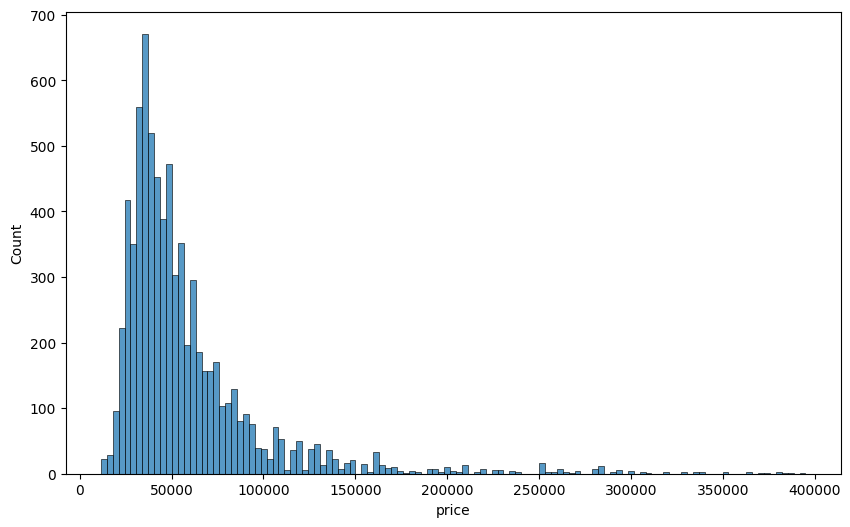

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(df, x='price')
plt.show()

In [28]:
df[['price','rooms', 'size', 'level', 'max_levels']].corrwith(df['price']) # xonalar bilan korilyatsiya yaxshi ekan

price         1.000000
rooms         0.564495
size          0.794205
level         0.063717
max_levels    0.238339
dtype: float64

In [29]:
df['price']=df['price'].fillna(df.groupby('rooms')['price'].transform('median'))

In [30]:
print(df.info()) # nan qiymatlar ham yo'qoldi

<class 'pandas.core.frame.DataFrame'>
Index: 7385 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7385 non-null   object 
 1   district    7385 non-null   object 
 2   rooms       7385 non-null   int64  
 3   size        7385 non-null   float64
 4   level       7385 non-null   int64  
 5   max_levels  7385 non-null   int64  
 6   price       7385 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 461.6+ KB
None


In [31]:
df.describe()

,rooms,size,level,max_levels,price
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,2.620176,72.997676,3.701828,6.036290,58449.945836
std,1.059293,35.362627,2.240347,2.609682,41859.922673
min,1.000000,20.000000,1.000000,1.000000,11500.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,3.000000,66.000000,3.000000,5.000000,46500.000000
75%,3.000000,85.000000,5.000000,9.000000,66500.000000
max,10.000000,456.000000,19.000000,25.000000,395000.000000


# Chizmalar bilan tahlil

In [32]:
df[['price', 'rooms', 'size', 'level', 'max_levels']].corrwith(df['price']).sort_values(ascending=False)

price         1.000000
size          0.794205
rooms         0.564495
max_levels    0.238339
level         0.063717
dtype: float64

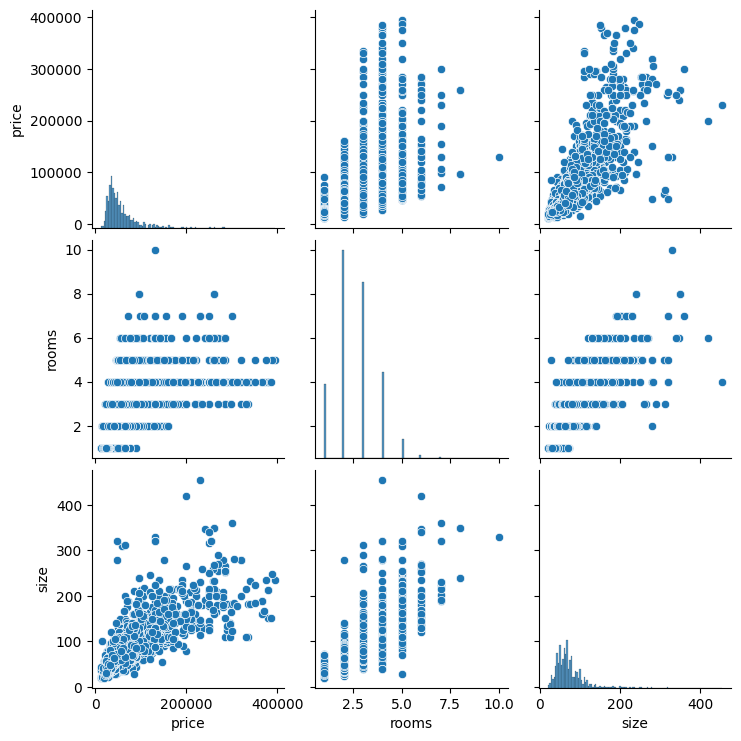

In [33]:
sns.pairplot(df[['price','rooms', 'size']])
plt.show()

In [34]:
df.shape

(7385, 7)

# train test ga bo'lish

In [35]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.8, random_state=30)
train.head()

,location,district,rooms,size,level,max_levels,price
2802,"город Ташкент, Учтепинский район, Чиланзар 23-...",Учтепинский,5,150.0,6,9,108000.0
1222,"город Ташкент, Чиланзарский район, Чиланзар-20",Чиланзарский,3,96.0,4,4,49000.0
5047,"город Ташкент, Мирабадский район, Тараса Шевченко",Мирабадский,3,90.0,5,5,57000.0
3596,"город Ташкент, Мирабадский район, Тонг Юлдузи",Мирабадский,4,122.0,3,5,65000.0
3624,"город Ташкент, Яшнободский район, Ташсельмаш",Яшнободский,2,62.0,7,9,44000.0


In [36]:
uylar=train.drop('price', axis=1)
uylar_son=uylar.drop(['district', 'location'], axis=1)
uylar_label=train['price'].copy()

# PiPline yaratish

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler, OrdinalEncoder
from sklearn.compose import  ColumnTransformer

In [38]:
num_list=list(uylar_son)
str_list=['location', 'district']

In [39]:
full_piline=ColumnTransformer([
    ("num_pip", StandardScaler(), num_list),
    ('str_pip', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), str_list)
])

In [40]:
x_train=full_piline.fit_transform(uylar)

# Modelni o'qitish

In [41]:
from sklearn.ensemble import  RandomForestRegressor
RF_model=RandomForestRegressor()

In [42]:
RF_model.fit(x_train, uylar_label)

RandomForestRegressor()

# Testlash

In [43]:
test_x=test.drop('price', axis=1)
test_y=test['price']

In [44]:
jamshid=full_piline.transform(test_x)

In [45]:
result=RF_model.predict(jamshid)
result[:10]

array([36645.16666667, 70276.5       , 39573.99      , 53901.44      ,
       57977.32333333, 28500.        , 27346.55238095, 50404.63095238,
       68229.97      , 36835.        ])

In [46]:
pd.DataFrame({'Bashorat':result, 'Asl_narh':test_y})

,Bashorat,Asl_narh
4264,36645.166667,22000.0
4023,70276.500000,72000.0
564,39573.990000,38500.0
60,53901.440000,63000.0
990,57977.323333,54996.0
...,...,...
3006,43011.666667,46000.0
692,51000.000000,51000.0
3963,62900.000000,68000.0
6252,39932.866667,41500.0


# Baholash

In [47]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_y, result)
np.sqrt(mse)

np.float64(19455.832019273115)

# Modelni yuklash va ishlatib ko'rish

In [48]:
import joblib
joblib.dump(RF_model, "predict_house_model")

['predict_house_model']

In [49]:
model=joblib.load("predict_house_model")
result2=model.predict(jamshid)

In [50]:
mse=mean_squared_error(test_y, result2)
np.sqrt(mse)

np.float64(19455.832019273115)

# PiPline hamda df ni yuklab olish

In [51]:
joblib.dump(uylar, "df_tashkent_house.csv")

['df_tashkent_house.csv']

In [52]:
joblib.dump(full_piline, "tashkent_house_pipline")

['tashkent_house_pipline']

In [53]:
joblib.dump(uylar_label, 'df_label')

['df_label']

In [54]:
joblib.dump(test_x, 'test_x')
joblib.dump(test_y, 'test_y')

['test_y']